# Contents

#### 01 Import Libraries and Dataset
#### 02 Clean and prepare data
#### 03 Time series decomposition

### 01 Import Libraries and Dataset

In [2]:
#not importing quandl becuase I am unable to get it to work and I found data elsewhere
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [3]:
#create import path
path = r'/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 6/Exercise 6.6'

In [90]:
#import data
df = pd.read_csv(os.path.join(path, 'Transposed suicides.csv'))

### 02 Clean and prepare data

In [92]:
df.head(5)

,DateTime,Suicides
0,1/1/1980,12.2
1,1/1/1981,12.3
2,1/1/1982,12.5
3,1/1/1983,12.4
4,1/1/1984,12.6


In [94]:
# Set the "Date" column as the index

from datetime import datetime

df['datetime'] = pd.to_datetime(df['DateTime']) # Create a datetime column from "Date.""
df = df.set_index('datetime') # Set the datetime as the index of the dataframe.
df.drop(['DateTime'], axis=1, inplace=True) # Drop the "Date" column.
df.head()

,Suicides
datetime,
1980-01-01,12.2
1981-01-01,12.3
1982-01-01,12.5
1983-01-01,12.4
1984-01-01,12.6


In [102]:
#set frequency
#mentor-generated code
df = df.asfreq('YS')

In [104]:
print("Original index:", df.index) # This will show RangeIndex

Original index: DatetimeIndex(['1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01',
               '1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01',
               '1988-01-01', '1989-01-01', '1990-01-01', '1991-01-01',
               '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
               '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
               '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01'],
              dtype='datetime64[ns]', name='datetime', freq='YS-JAN')


In [106]:
df.index = pd.Index(df.index)

In [108]:
#check index
print("New index:", df.index) # This will show Index

New index: DatetimeIndex(['1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01',
               '1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01',
               '1988-01-01', '1989-01-01', '1990-01-01', '1991-01-01',
               '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
               '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
               '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01'],
              dtype='datetime64[ns]', name='datetime', freq='YS-JAN')


In [110]:
data.shape

(42, 1)

In [112]:
data.columns

RangeIndex(start=0, stop=1, step=1)

In [114]:
type(data)

pandas.core.frame.DataFrame

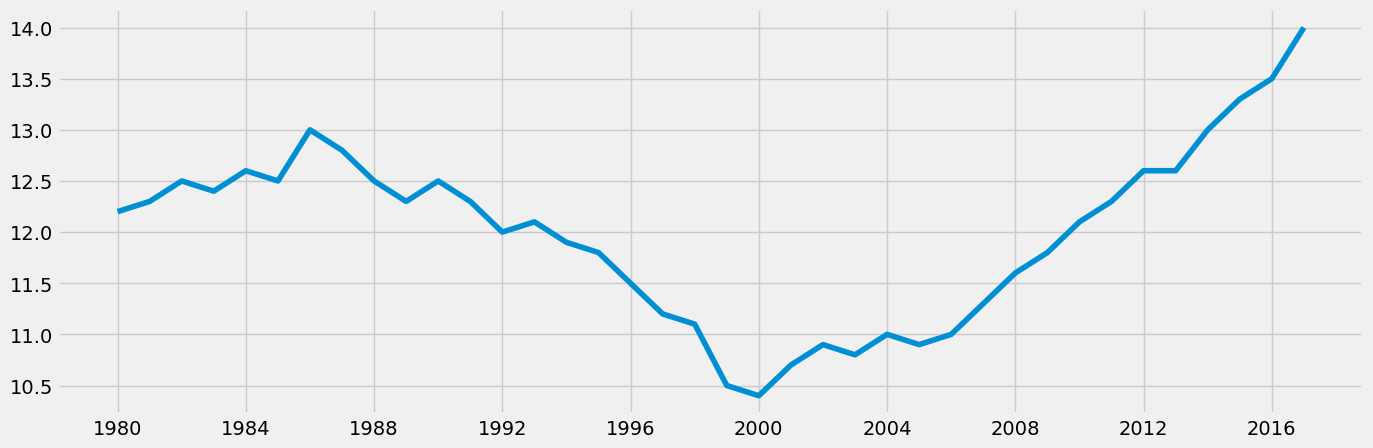

In [116]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df)

In [120]:
# Check for missing values (you shouldn't have any)

df.isnull().sum() 

Suicides    0
dtype: int64

In [57]:
# Check for duplicates

dups = df.duplicated()
dups.sum()

# No true dups; years are different

14

### 03 Time series decomposition

In [122]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df, model='additive')

In [124]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

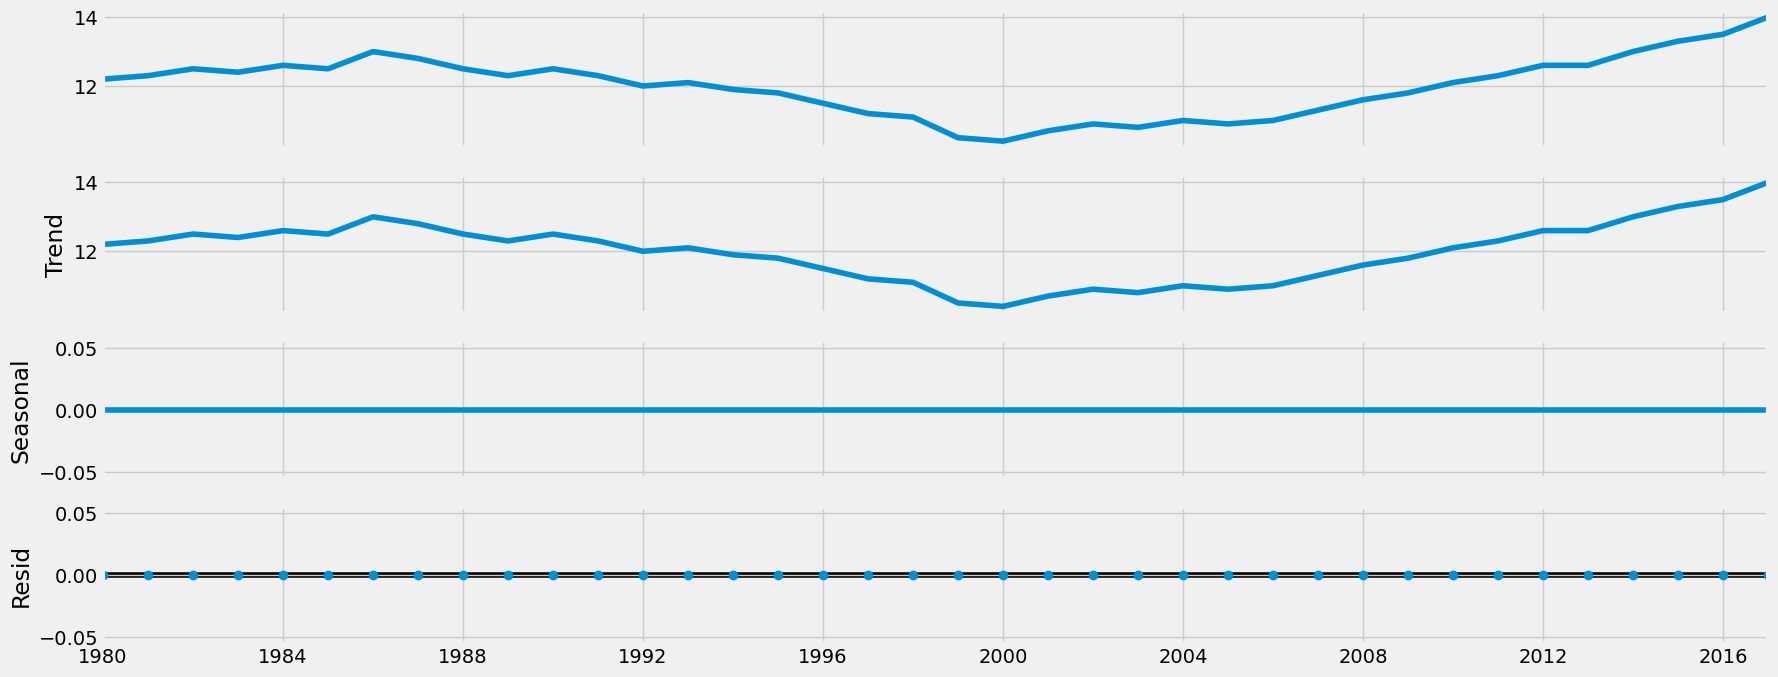

In [126]:
# Plot the separate components

decomposition.plot()
plt.show()

#### Comments

The trend parallels the original line graph. There is no seasonality or residual effects, meaning the graph reflects the true nature of the data. There was a drop in suicides around 2010 and they have been rising ever since.

In [130]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df['Suicides'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.801878
p-value                         0.818570
Number of Lags Used             3.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


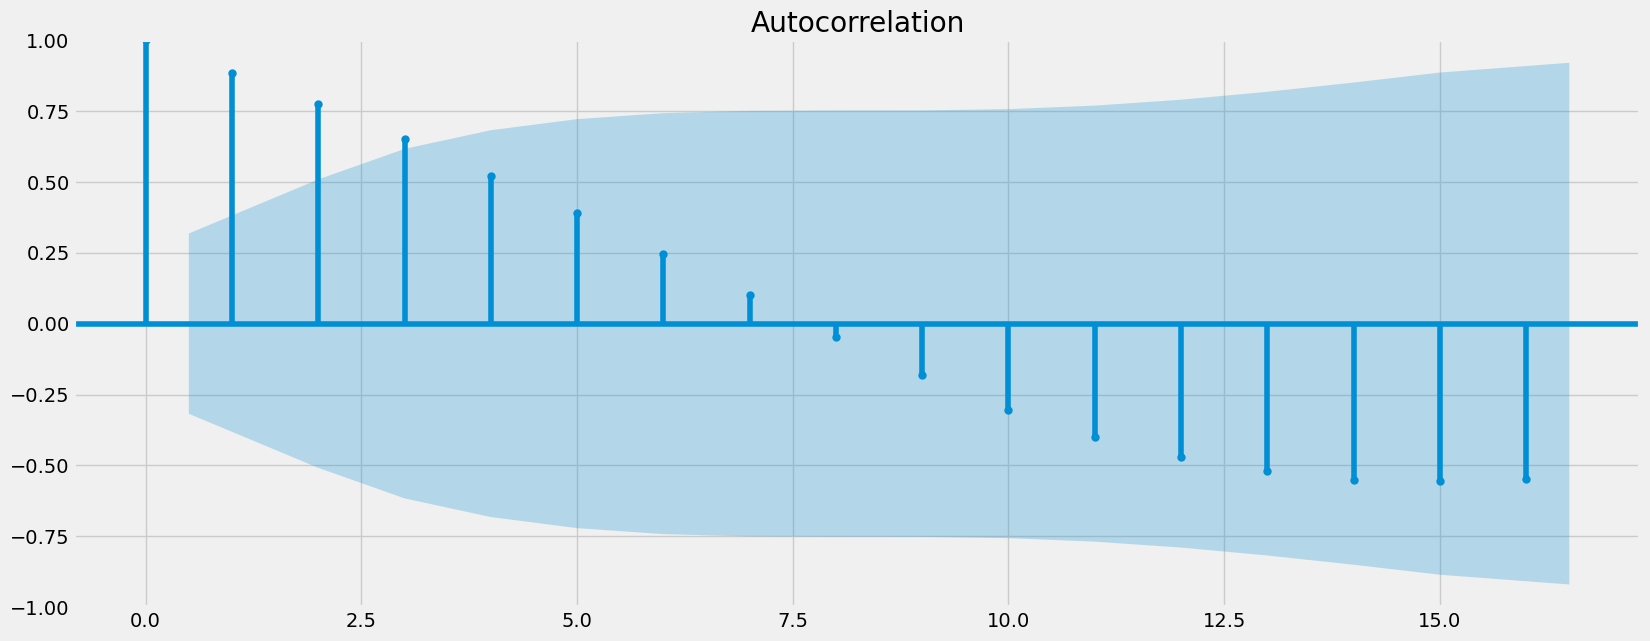

In [134]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df)
plt.show()

#### Comments

This test disproves the hull hypothesis that there is a unit root causing irregular fluctuations in the data. We can conclude from thsi information that the data is stationary. No further changes are necessary.